In this project, we'll be implementing multiple machine learning algorithms and comparing their performances to determine which turns out to be the best for fraud detection.

## Fetching Data

In [1]:
import os
import tarfile
import urllib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("creditcard.csv", encoding="ISO-8859-1")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

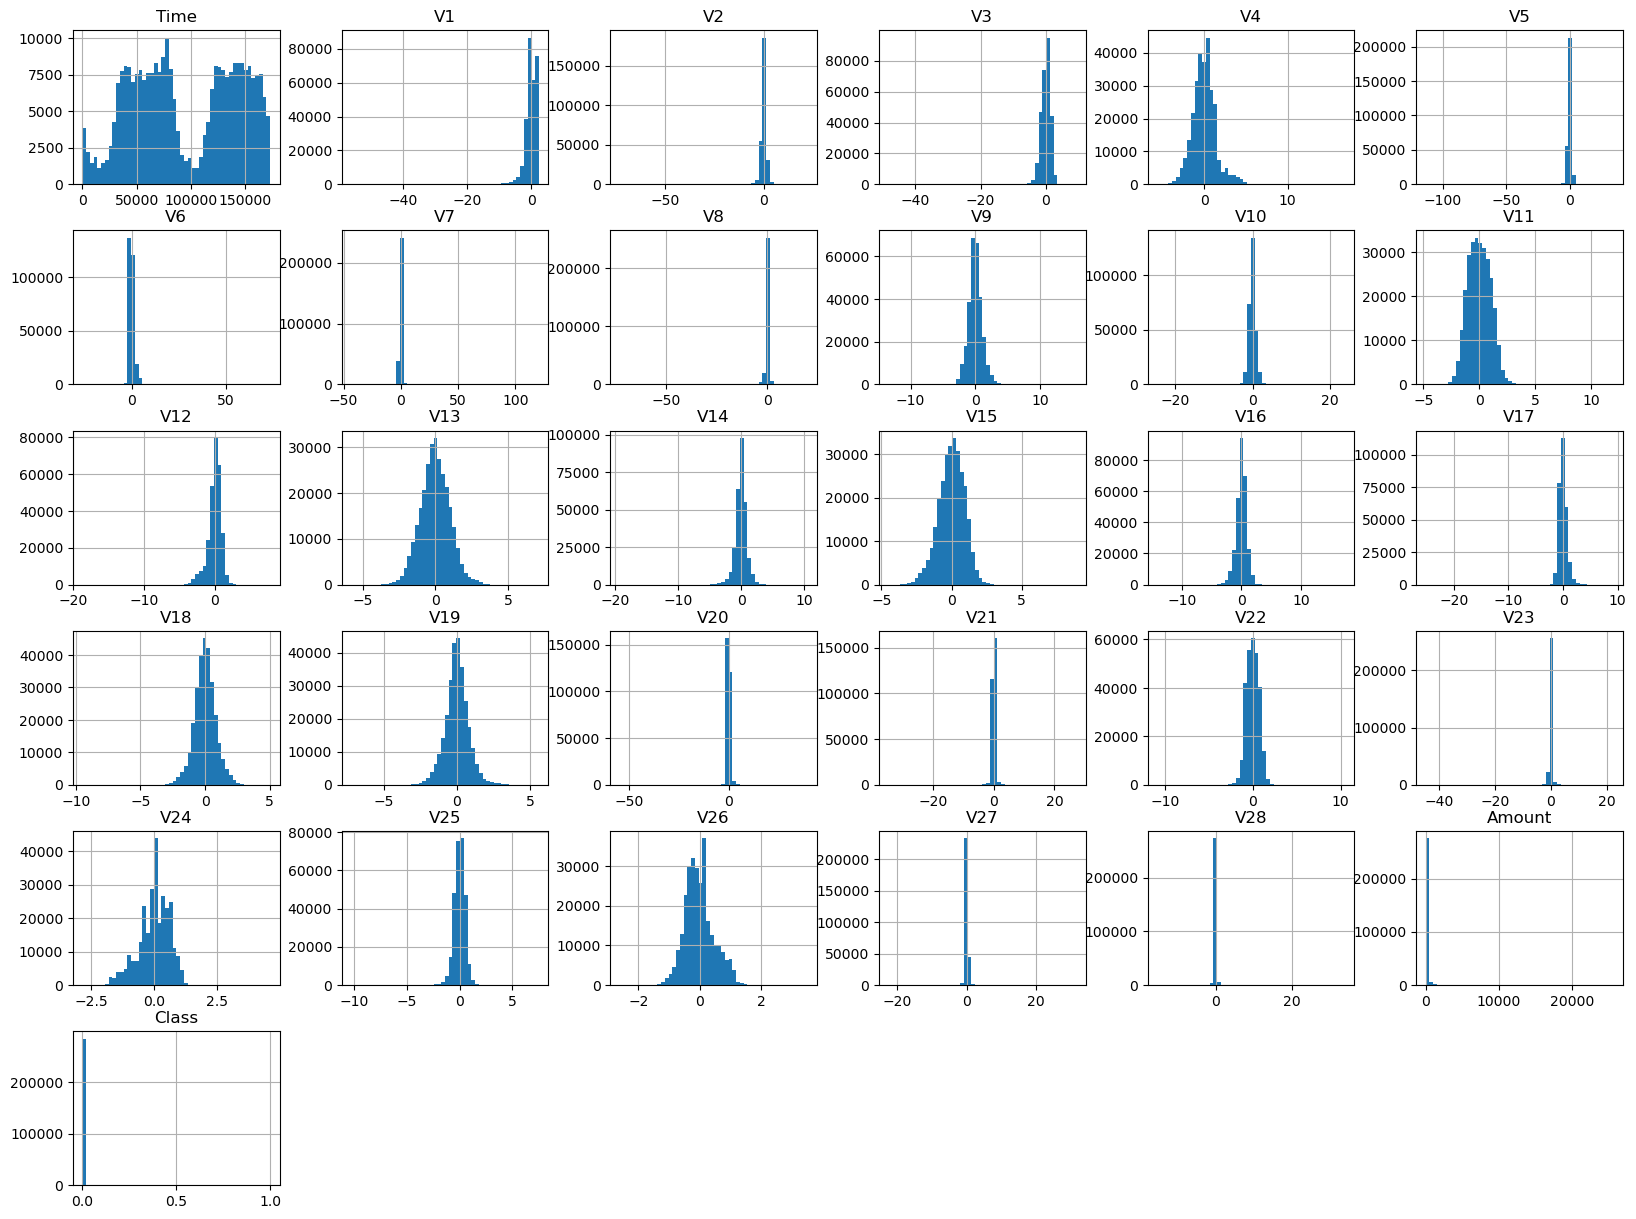

In [6]:
df.hist(bins=50, figsize=(20,15))
plt.show()

In [7]:
# Checking if there are any missing values

df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

There are no null values.

In [8]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [9]:
# Counting the number of fraud and genuine transactions

df["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

Only 492 transactions are fraud and the rest are genuine.

In [10]:
# Count the number of each class
counts = df["Class"].value_counts()

# Calculate percentages
fraud_percent = (counts[1] / counts.sum()) * 100
genuine_percent = (counts[0] / counts.sum()) * 100

print(f"Fraud Transactions: {fraud_percent:.4f}%")
print(f"Genuine Transactions: {genuine_percent:.4f}%")

Fraud Transactions: 0.1727%
Genuine Transactions: 99.8273%


This exhibits the skew in the dataset as 99.823% transactions are genuine.

# Supervised Learning Algorithms

## Creating a Test Set

Implementing hashing to ensure that the test set remains the same, everytime the algorithm is run

In [11]:
from zlib import crc32

def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [12]:
def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [13]:
df_with_id= df.reset_index()  # adds an index column
train_set, test_set = split_train_test_by_id(df_with_id, 0.2, "index")

## Visualizing the Data

In [14]:
data = train_set.copy()   # Creating a copy of the training set to experiment on

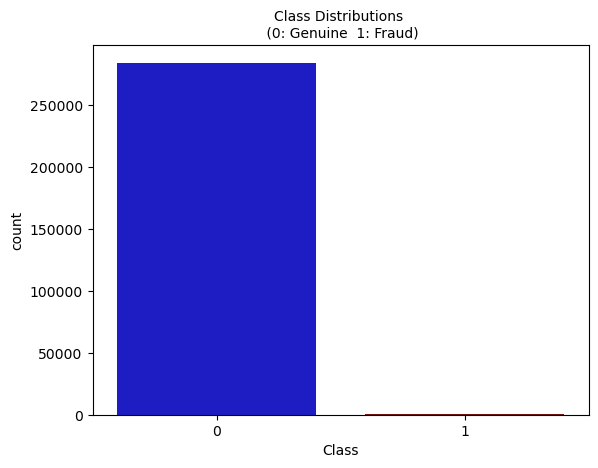

In [15]:
colors = ["#0101DF", "#8B0000"]

sns.countplot(x='Class', data=df, palette=colors)
plt.title('Class Distributions \n (0: Genuine  1: Fraud)', fontsize=10)
plt.show()

Shows the skew in the data provided.

Visulaizing the transactions amounts and time:

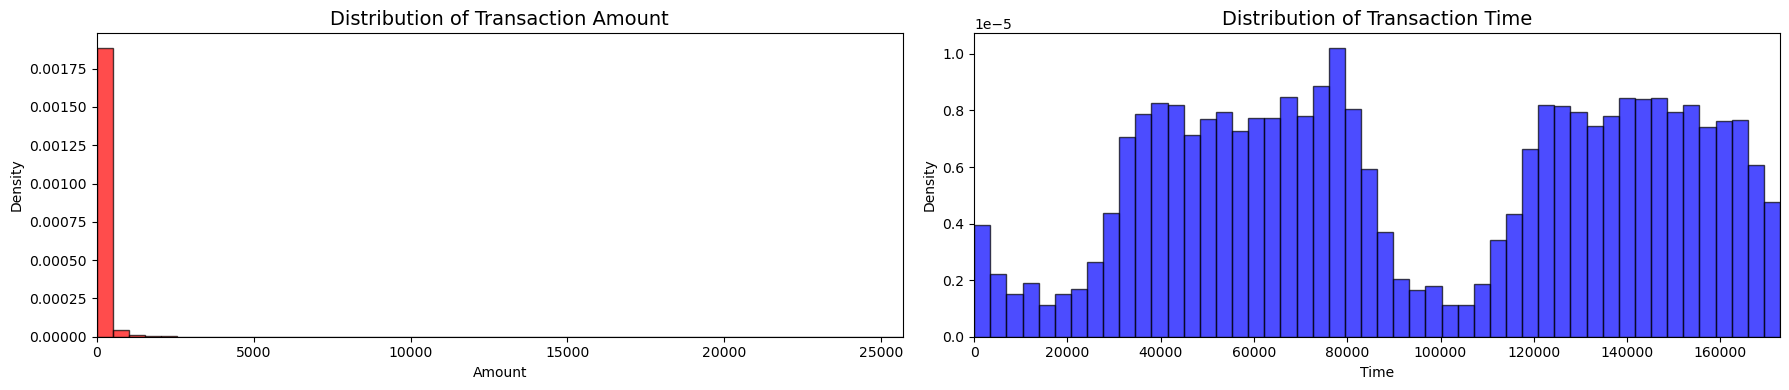

In [16]:
# Extracting data
amount_val = df['Amount'].values
time_val = df['Time'].values

# Setting up the figure and axes
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

# Plotting histogram for Transaction Amount
ax[0].hist(amount_val, bins=50, color='red', edgecolor='black', alpha=0.7, density=True)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_xlabel('Amount')
ax[0].set_ylabel('Density')

# Plotting histogram for Transaction Time
ax[1].hist(time_val, bins=50, color='blue', edgecolor='black', alpha=0.7, density=True)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

## Traning Models

### Training Linear Regression

We can move straight up to linear regression as there were no missing values and since the data is already PCA-transformed, it is scaled and pre-processed as well.

In [17]:
data_x = data.drop("Class", axis=1)
data_y = data["Class"]

In [18]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(data_x, data_y)

LinearRegression()

Trying out the model on a few data points:

In [19]:
some_data = data_x.iloc[:5]
some_labels = data_y.iloc[:5]
print("Predictions:", lin_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [0.00393322 0.0030246  0.00324381 0.00318693 0.00174257]
Labels: [0, 0, 0, 0, 0]


This gives a regression result, using a binary classification:

In [20]:
some_data = data_x.iloc[:5]
some_labels = data_y.iloc[:5]

# Predict and threshold: if prediction > 0.5, return 1 else 0
predictions = lin_reg.predict(some_data)
thresholded_preds = np.where(predictions > 0.5, 1, 0)

print("Predictions:", list(thresholded_preds))
print("Labels:", list(some_labels))

Predictions: [0, 0, 0, 0, 0]
Labels: [0, 0, 0, 0, 0]


Checking the accuracy of predictions:

In [21]:
from sklearn.metrics import accuracy_score

# Step 1: Predict using the trained linear regression model
y_pred_reg = lin_reg.predict(data_x)

# Step 2: Convert regression outputs to binary labels
y_pred_labels = np.where(y_pred_reg > 0.5, 1, 0)

# Step 3: Compare with actual labels
accuracy = accuracy_score(data_y, y_pred_labels)

print("Accuracy:", accuracy)

Accuracy: 0.9988106105824935


In [22]:
test = test_set.copy()   # Creating a copy of the test set

In [23]:
test_x = test.drop("Class", axis=1)
test_y = test["Class"]

In [24]:
# Step 1: Predict using the trained linear regression model
y_test_reg = lin_reg.predict(test_x)

# Step 2: Convert regression outputs to binary labels
y_test_labels = np.where(y_test_reg > 0.5, 1, 0)

# Step 3: Compare with actual labels
accuracy = accuracy_score(test_y, y_test_labels)

print("Accuracy:", accuracy)

Accuracy: 0.9990870626239927


An accuracy of ~99.9% seems excellent at first glance but for this condition, this can be misleading as the data is very highly imbalanced.

Creating a confusion matrix for the same:

Confusion Matrix:
[[56863    10]
 [   42    44]]


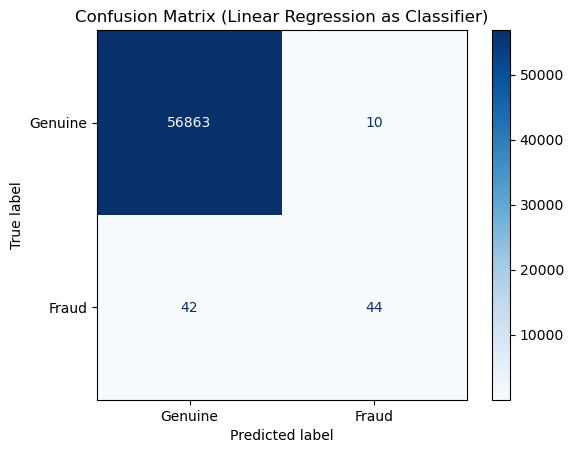

In [25]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

cm = confusion_matrix(test_y, y_test_labels)
print("Confusion Matrix:")
print(cm)

# Display the Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Genuine", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Linear Regression as Classifier)")
plt.show()

In [26]:
# Classification Report
print("\nClassification Report:")
print(classification_report(data_y, y_pred_labels, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9989    0.9999    0.9994    227442
           1     0.8462    0.4064    0.5491       406

    accuracy                         0.9988    227848
   macro avg     0.9225    0.7031    0.7742    227848
weighted avg     0.9987    0.9988    0.9986    227848



Despite seeming to perform well on this data, linear regression is not the best way to detect credit card frauds as it needs a large amount of data to learn from and the given dataset has very few fraud examples to actually learn from.

Even now, the fraud predictions are split 50%-50%.

It predicts real-valued numbers (e.g. -3.42, 0.91, 1.75), not probabilities. You have to manually apply a threshold (like 0.5), which is arbitrary and non-probabilistic.

Linear Regression can output values far below 0 or above 1, which makes no sense for class probabilities.

Since fraud is rare, the model learns to predict “non-fraud” all the time. Without a proper classification framework (like class weights or log loss), it can ignore rare classes like fraud.

In [27]:
# Checking for precision and recall

from sklearn.metrics import precision_score, recall_score
print(precision_score(test_y, y_test_labels))
print(recall_score(test_y, y_test_labels))

0.8148148148148148
0.5116279069767442


Precision and recall make the results look not-so-shiny.

### Training Logisitic Regression

In [28]:
data_x = data.drop("Class", axis=1)
data_y = data["Class"]

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

Using and fitting on cross-validation sets:

In [30]:
log_reg = LogisticRegression(random_state=42)
y_pred_logreg = cross_val_predict(log_reg, data_x, data_y, cv=5, n_jobs=-1)
# n_jobs=-1: uses all available CPU cores for parallel processing to speed things up

In [31]:
cm_log = confusion_matrix(data_y, y_pred_logreg)
print("Confusion Matrix:\n", cm_log)

Confusion Matrix:
 [[226957    485]
 [   138    268]]


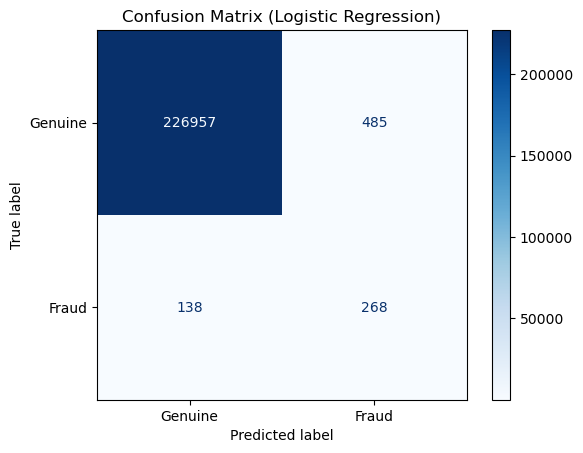

In [32]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Genuine", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

In [33]:
print("\nClassification Report:")
print(classification_report(data_y, y_pred_logreg, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9994    0.9979    0.9986    227442
           1     0.3559    0.6601    0.4625       406

    accuracy                         0.9973    227848
   macro avg     0.6777    0.8290    0.7305    227848
weighted avg     0.9982    0.9973    0.9977    227848



While Linear Regression yielded higher precision in this dataset, it is conceptually flawed for classification tasks. Logistic Regression, despite slightly lower precision, is statistically grounded and achieved significantly higher recall — catching more fraud cases. Hence, it is the more reliable and scalable approach in real-world fraud detection systems.

Working with the test set:

In [34]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(data_x, data_y)
y_test_pred = log_reg.predict(test_x)

In [35]:
cm_test = confusion_matrix(test_y, y_test_pred)
print("Confusion Matrix (Test Set):\n", cm_test)

Confusion Matrix (Test Set):
 [[56838    35]
 [   24    62]]


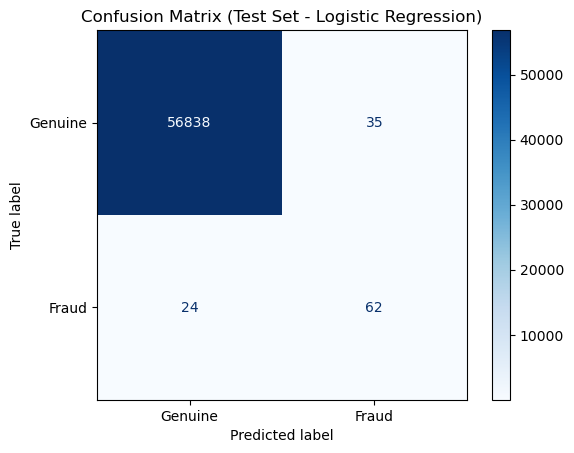

In [36]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Genuine", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Test Set - Logistic Regression)")
plt.show()

In [37]:
print("\nClassification Report:")
print(classification_report(test_y, y_test_pred, digits=4))


Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9994    0.9995     56873
           1     0.6392    0.7209    0.6776        86

    accuracy                         0.9990     56959
   macro avg     0.8194    0.8602    0.8385     56959
weighted avg     0.9990    0.9990    0.9990     56959



Interestingly, the model performs better on the test set than on the cross-validation sets!

### Logistic Regression with SMOTE

SMOTE stands for Synthetic Minority Oversampling Technique.

It’s a method to handle class imbalance by creating synthetic data for the minority class (e.g., fraud cases).

In fraud detection, the number of frauds is tiny compared to genuine transactions. If you train a model on this imbalance, it will mostly learn to predict "not fraud". SMOTE helps by making the dataset more balanced, allowing the model to learn what fraud looks like.

Working of SMOTE: 

1. Picks a fraud example from your dataset.

2. Finds its k nearest neighbors (other frauds).

3. Randomly picks one of the neighbors.

4. Interpolates a new, synthetic point between the two.

This way, the new fraud examples are slightly different and more diverse.

In [38]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(data_x, data_y)

In [39]:
# Shows how many new data points were created by SMOTE
print("Original training set class distribution:\n", data_y.value_counts())
print("After SMOTE class distribution:\n", y_train_sm.value_counts())

Original training set class distribution:
 Class
0    227442
1       406
Name: count, dtype: int64
After SMOTE class distribution:
 Class
0    227442
1    227442
Name: count, dtype: int64


In [40]:
# Training logistic regression on new data
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_sm, y_train_sm)

LogisticRegression(max_iter=1000, random_state=42)

Prediction is made on original test set and not one modified by SMOTE as SMOTE is just used to generate more samples to better train the data; it's not to be used to modify the test set itself as that would skew the results.

In [41]:
y_test_pred = log_reg.predict(test_x)


Confusion Matrix (Test Set after SMOTE):
 [[55496  1377]
 [   11    75]]


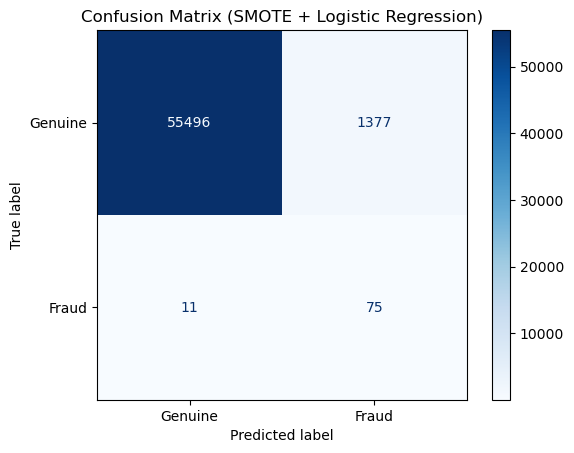

In [42]:
cm_smote = confusion_matrix(test_y, y_test_pred)
print("\nConfusion Matrix (Test Set after SMOTE):\n", cm_smote)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=["Genuine", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (SMOTE + Logistic Regression)")
plt.show()

In [43]:
print("\nClassification Report (SMOTE + Logistic Regression):")
print(classification_report(test_y, y_test_pred, digits=4))


Classification Report (SMOTE + Logistic Regression):
              precision    recall  f1-score   support

           0     0.9998    0.9758    0.9876     56873
           1     0.0517    0.8721    0.0975        86

    accuracy                         0.9756     56959
   macro avg     0.5257    0.9239    0.5426     56959
weighted avg     0.9984    0.9756    0.9863     56959



After applying SMOTE to the training data, the logistic regression model showed a significant shift in performance on the original test set. While the recall for the fraud class improved notably from 0.72 to 0.87—indicating the model was able to catch more fraudulent cases—the precision dropped sharply from 0.64 to just 0.05. This means the model began flagging many genuine transactions as fraud, resulting in a large number of false positives. Consequently, the F1-score for fraud detection fell from 0.68 to 0.10. Overall accuracy also declined from 99.9% to 97.6%, largely due to misclassifications of genuine transactions. While SMOTE successfully increased sensitivity to fraud, it did so at the expense of precision and overall balance.

SMOTE helps recall but hurts precision heavily. It floods the model with synthetic frauds, making it oversensitive and likely to label many genuine transactions as fraud. Great if your priority is catching as many frauds as possible, even at the cost of false alarms. But not ideal if you want to reduce false positives.

Generating a ROC curve:

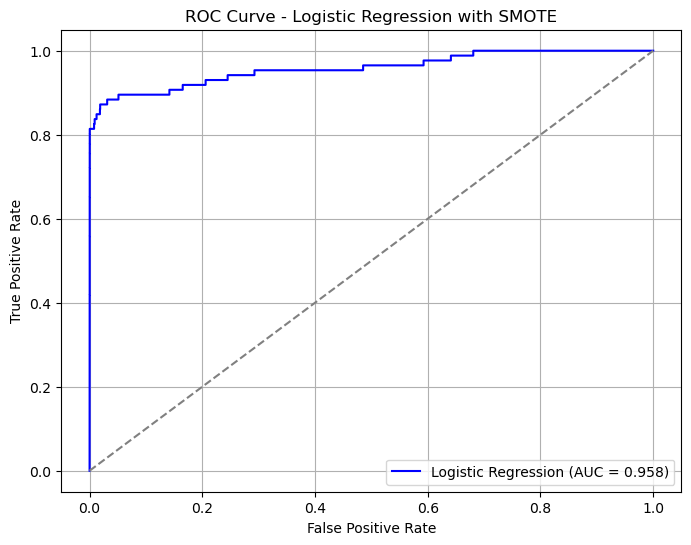

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# Train on SMOTE-balanced data
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_sm, y_train_sm)

# Predict probabilities on original test set
y_proba = log_reg.predict_proba(test_x)[:, 1]  # Probabilities for class 1 (fraud)

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_y, y_proba)
auc_score = roc_auc_score(test_y, y_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.3f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression with SMOTE')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

Prescision Recall Curve:

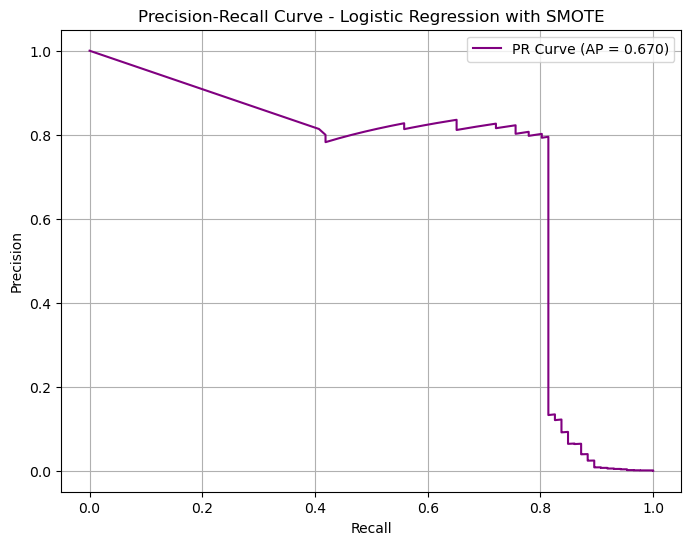

In [45]:
from sklearn.metrics import precision_recall_curve, average_precision_score

# Predict probabilities on the test set
y_proba = log_reg.predict_proba(test_x)[:, 1]  # Prob for class 1 (fraud)

# Get precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(test_y, y_proba)

# Average Precision Score (like AUC for PR curve)
ap_score = average_precision_score(test_y, y_proba)

# Plot the PR curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='purple', label=f'PR Curve (AP = {ap_score:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Logistic Regression with SMOTE')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

### Traning Random Forest Classifier

By changing class weights:

Grants more weightage to less frequest class without actually modifying original data; Works better than SMOTE with tree based models (for example- Random Forest)

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# Training the model

rf_weighted = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_weighted.fit(data_x, data_y)
y_pred_weighted = rf_weighted.predict(test_x)
y_proba_weighted = rf_weighted.predict_proba(test_x)[:, 1]

In [48]:
print("\nRandom Forest (Class Weights)")
print(classification_report(test_y, y_pred_weighted))
print("Confusion Matrix:\n", confusion_matrix(test_y, y_pred_weighted))


Random Forest (Class Weights)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56873
           1       0.93      0.79      0.86        86

    accuracy                           1.00     56959
   macro avg       0.97      0.90      0.93     56959
weighted avg       1.00      1.00      1.00     56959

Confusion Matrix:
 [[56868     5]
 [   18    68]]


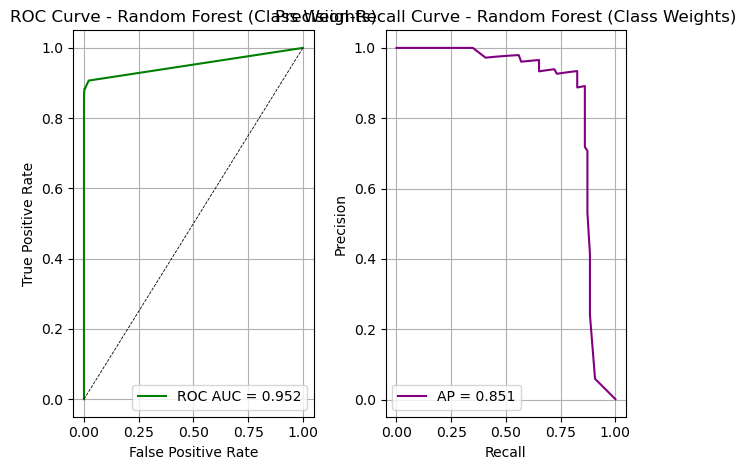

In [49]:
# Plot ROC Curve
fpr_w, tpr_w, _ = roc_curve(test_y, y_proba_weighted)
auc_w = roc_auc_score(test_y, y_proba_weighted)

plt.subplot(1, 2, 1)
plt.plot(fpr_w, tpr_w, color='green', label=f'ROC AUC = {auc_w:.3f}')
plt.plot([0, 1], [0, 1], 'k--', linewidth=0.6)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Class Weights)')
plt.legend()
plt.grid(True)

# Plot Precision-Recall Curve
precision_w, recall_w, _ = precision_recall_curve(test_y, y_proba_weighted)
ap_w = average_precision_score(test_y, y_proba_weighted)

plt.subplot(1, 2, 2)
plt.plot(recall_w, precision_w, color='purple', label=f'AP = {ap_w:.3f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - Random Forest (Class Weights)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Training XGBoost

In [50]:
from xgboost import XGBClassifier

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0]
}

# Define base model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Grid search using 5-fold CV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',   # You can use 'roc_auc' or 'recall' if preferred
    cv=5,
    verbose=1,
    n_jobs=-1
)

# Fit on SMOTE-balanced data
grid_search.fit(X_train_sm, y_train_sm)

# Get the best model
xgb_model = grid_search.best_estimator_
print("Best Parameters Found:\n", grid_search.best_params_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\videh\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:12:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters Found:
 {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50, 'subsample': 0.8}


In [52]:
y_pred = xgb_model.predict(test_x)
y_pred_prob = xgb_model.predict_proba(test_x)[:, 1]

print("Confusion Matrix:")
print(confusion_matrix(test_y, y_pred))

print("\nClassification Report:")
print(classification_report(test_y, y_pred))

Confusion Matrix:
[[56470   403]
 [   10    76]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56873
           1       0.16      0.88      0.27        86

    accuracy                           0.99     56959
   macro avg       0.58      0.94      0.63     56959
weighted avg       1.00      0.99      1.00     56959



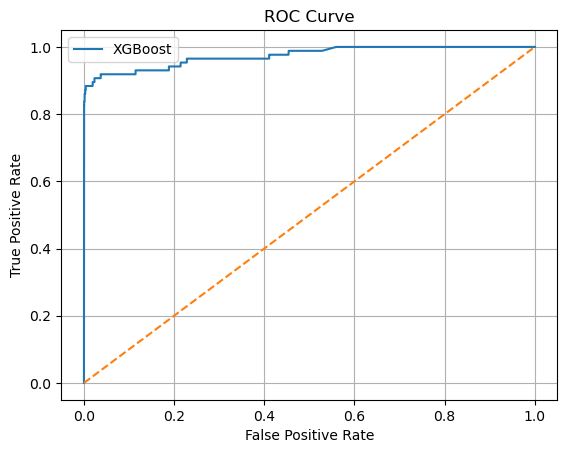

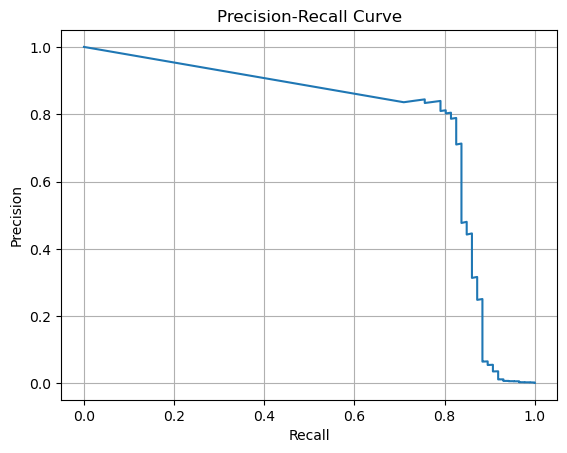

In [53]:
# ROC Curve
fpr, tpr, _ = roc_curve(test_y, y_pred_prob)
plt.plot(fpr, tpr, label='XGBoost')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
prec, rec, _ = precision_recall_curve(test_y, y_pred_prob)
plt.plot(rec, prec, label='XGBoost PR')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid(True)
plt.show()

### Training Anomaly Detection

We'll implement Gaussian (Normal) Distribution–based Anomaly Detection for anomaly detection.

We assume:
Normal transactions follow a multivariate Gaussian distribution (mean & covariance estimated from non-fraud data).
Fraudulent transactions will lie far from this distribution (i.e., have very low probability under the normal model).

In [54]:
from scipy.stats import multivariate_normal

To train and execute this algorithm, we'll be using this approach: for training the data we'll be using a set of just genuine transactions; for cross-validation, our dataset will comprise of 50% of the fraud cases and an appropriate number of genuine cases and a similar dataset for the test set.

NOTE:

This test set is **not the same** as the one used for supervised models.
It is manually constructed to include 50% fraud + 50% genuine transactions, for controlled evaluation of the unsupervised anomaly detection model.

In [55]:
# Splitting the original dataset
df_fraud = df[df['Class'] == 1]
df_genuine = df[df['Class'] == 0]

In [56]:
# Training on ALL genuine data
X_train = df_genuine.drop("Class", axis=1)
y_train = df_genuine["Class"]       # Will not be used in training

In [57]:
# Split fraud data into 50/50
fraud_half = len(df_fraud) // 2
df_fraud_val = df_fraud.iloc[:fraud_half]
df_fraud_test = df_fraud.iloc[fraud_half:]

In [58]:
# Add equal amount of genuine data to each split
df_genuine_val = df_genuine.sample(n=len(df_fraud_val), random_state=42)
df_genuine_test = df_genuine.drop(df_genuine_val.index).sample(n=len(df_fraud_test), random_state=42)

In [59]:
# Final validation and test sets
df_val = pd.concat([df_fraud_val, df_genuine_val])
df_test = pd.concat([df_fraud_test, df_genuine_test])

In [60]:
# Shuffle the sets
df_val = df_val.sample(frac=1, random_state=42).reset_index(drop=True)
df_test = df_test.sample(frac=1, random_state=42).reset_index(drop=True)

X_val = df_val.drop("Class", axis=1)
y_val = df_val["Class"]

X_test = df_test.drop("Class", axis=1)
y_test = df_test["Class"]

In [61]:
# Fitting model on 100% genuine data
mean = X_train.mean().values
cov = np.cov(X_train.values.T)
gaussian_model = multivariate_normal(mean=mean, cov=cov, allow_singular=True)

Validation Set Evaluation:
[[246   0]
 [221  25]]
              precision    recall  f1-score   support

           0     0.5268    1.0000    0.6900       246
           1     1.0000    0.1016    0.1845       246

    accuracy                         0.5508       492
   macro avg     0.7634    0.5508    0.4373       492
weighted avg     0.7634    0.5508    0.4373       492

Test Set Evaluation:
[[246   0]
 [232  14]]


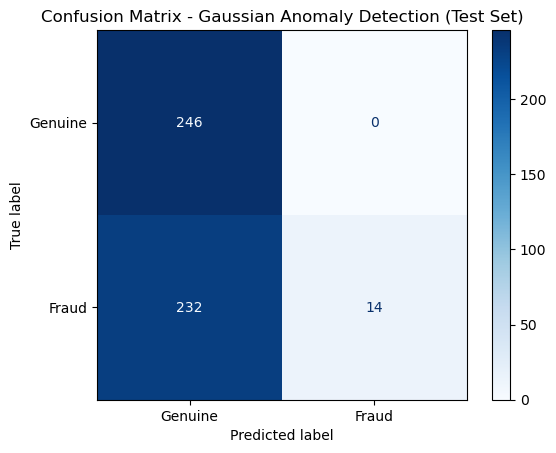


Classification Report:
              precision    recall  f1-score   support

           0     0.5146    1.0000    0.6796       246
           1     1.0000    0.0569    0.1077       246

    accuracy                         0.5285       492
   macro avg     0.7573    0.5285    0.3936       492
weighted avg     0.7573    0.5285    0.3936       492



In [62]:
# Compute log-probs for validation
log_probs_val = gaussian_model.logpdf(X_val.values)
threshold = np.percentile(log_probs_val, 5)  # Set using validation set
y_pred_val = (log_probs_val < threshold).astype(int)

# --- EVALUATE on Validation ---
print("Validation Set Evaluation:")
print(confusion_matrix(y_val, y_pred_val))
print(classification_report(y_val, y_pred_val, digits=4))

# Compute log-probs for test
log_probs_test = gaussian_model.logpdf(X_test.values)
y_pred_test = (log_probs_test < threshold).astype(int)

# --- EVALUATE on Test ---
print("Test Set Evaluation:")
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Genuine", "Fraud"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Gaussian Anomaly Detection (Test Set)")
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, digits=4))

In this credit card fraud detection task, multiple machine learning models were evaluated based on their ability to correctly identify fraudulent transactions (class 1). The core metrics used to assess performance were precision, recall, F1-score, and accuracy, with a particular focus on recall and F1-score, as missing fraud (false negatives) is generally more costly than flagging normal transactions as fraud (false positives).

The Gaussian Anomaly Detection model demonstrated perfect precision (1.00), indicating that every transaction it flagged as fraud was indeed fraudulent. However, it achieved a very low recall of just 5.69%, which means it missed over 94% of the actual fraud cases. This led to a poor F1-score of 0.1077. The model was highly conservative, only flagging the most statistically extreme outliers. While this minimizes false alarms, it fails in a real-world fraud detection context where high recall is critical. Thus, Gaussian anomaly detection may be useful as a component in a hybrid system, but not as a standalone solution.

The XGBoost model showed a much more balanced and aggressive fraud detection profile. It achieved a recall of 87%, meaning it successfully identified the vast majority of frauds. However, its precision was relatively low at 28%, indicating a high false positive rate. This is typical for models that prioritize recall. The F1-score of 0.43 reflects a moderate balance between precision and recall. XGBoost is particularly suited for scenarios where catching as many frauds as possible is more important than occasionally misclassifying a legitimate transaction. It’s a strong candidate for real-world use, especially when supported by downstream verification systems.

The Random Forest classifier with class weights balanced emerged as the most well-rounded performer. It attained a high precision of 93% and an excellent recall of 79%, leading to a very strong F1-score of 0.86. This indicates that the model was both highly accurate in identifying fraud and efficient in minimizing false alarms. With almost no trade-offs, this model is robust, interpretable, and effective, making it one of the top candidates for deployment in a production fraud detection environment.

Logistic Regression with SMOTE achieved the highest recall of all models (87.21%), ensuring that almost all fraud cases were detected. However, its precision was extremely poor (5.17%), resulting in a very low F1-score of just 0.0975. This model clearly prioritized recall at the expense of a massive increase in false positives. While such a strategy can be useful in specific high-sensitivity applications, it may not be practical for customer-facing systems, where the cost of frequent false alarms is high.

The Logistic Regression model without SMOTE performed significantly better in terms of balance. It achieved a precision of 63.92% and recall of 72.09%, yielding an F1-score of 0.6776. This shows that a simple logistic model, when trained on the imbalanced dataset without synthetic oversampling, can still learn useful fraud patterns. Its moderate precision-recall balance makes it a fair choice for lightweight systems where interpretability and speed are important.

Finally, Linear Regression used for binary classification produced a high precision of 84.62% but a low recall of 40.64%, leading to an F1-score of 0.5491. This model was highly conservative, prioritizing correctness over coverage. As linear regression isn’t inherently built for classification tasks, its underperformance in recall is expected. It might be useful in exploratory analysis, but it's suboptimal for a mission-critical application like fraud detection.

### Overall Conclusion:
The classification reports reveal that Random Forest with balanced class weights is the most reliable model overall — combining high precision and recall with minimal tuning. XGBoost is highly effective at capturing fraud but may require additional filtering to handle false positives. Gaussian Anomaly Detection, while theoretically aligned with the problem, is too cautious to be effective alone. SMOTE-enhanced logistic regression detects nearly all frauds but floods the system with false alarms. In contrast, the non-SMOTE logistic model offers a better trade-off. This shows that in practical fraud detection, well-tuned supervised models often outperform pure anomaly detection, particularly when some labeled data is available.